# Projet numérique - Calcul différentiel II - Damien Capéraa & Camille Klopocki

In [3]:
import matplotlib.pyplot as plt
import autograd
from autograd import numpy as np
from numpy import linalg
import itertools

## Amorce pour le contour simple

On considère une fonction f définie dans le carré unité [0,1]². On cherche y tel que *f(0,y) = c* pour c réel.
Nous avons choisi une méthode par dichotomie pour `find_seed`.La contrainte de cette méthode est qu'elle suppose une hypothèse forte : *f(0,y) - c* et *f(1,y) - c* doivent être de signes opposés.\
\
*NB :* Cette hypothèse forte a le mérite d'être facile à tester et peut gênante. C'est pourquoi nous l'avons gardé pour la méthode des petits carrés qui suit. 

**Justification mathématique de la correction de la dichotomie:**\
f est supposée continûment différentiable sur son domaine de définition [0,1]². f est donc continue sur [0,1]². Ainsi si *f(0,y) - c* et *f(1,y) - c* sont de signes opposés, alors, par le théorème des valeurs intermédiaires, il existe un réel t de [0,1] tel que *f(0,t) - c = 0*.

In [4]:
def find_seed(f, c, eps=2**(-26)) :
    
    def g(y) :
        return f(0,y) - c
    
    a, b = 0, 1
    
    if g(a)*g(b) >= 0 :
        if g(b)==0 :
            return b
        if g(a)==0 :
            return a
        else : #dans ce cas, notre hypothèse n'est pas vérifiée
            return None

    while b-a >= 2*eps :
        m = (a+b)/2
        if g(m)==0 :
            return m
        if g(m)*g(b) >= 0 :
            b = m
        else :
            a = m
    return (a+b)/2 #Comme l'intervalle est de taille au plus 2*eps, on renvoit bien le 0 à + ou - eps.

On vérifie la fonction en introduisant l'application de l'énoncé `f_enonce` :

In [5]:
def f_enonce(x,y) :
    return 2*(np.exp(-x**2 -y**2) - np.exp(-(x-1)**2 - (y-1)**2))
find_seed(f_enonce, 0.5)

0.7250969037413597

## Idée 1 : La méthode du scan

### Description

**Principe :** On effectue un scan du carré d'étude [0,1]² de gauche à droite en stockant toutes les racines trouvées pour pouvoir les afficher ensuite. 

*Remarque :* Avec cette méthode, on peut trouver des lignes de niveau qui ne commence pas sur le côté gauche.

### Place au code

On adapte notre première fonction `find_seed` pour qu'elle puisse être utilisée à tout x0 constant. On code ainsi la fonction `find_seed_x0` suivante :\
*NB :* La fonction ici présentée est celle que nous utilisons dans la méthode des petits carrés. C'est donc une version aboutie avec des variables "généralisées" valminy et valmaxy (bornes pour y).

In [6]:
valminy=0
valmaxy=1
eps = 2**(-26)
def find_seed_x0(f, c, x0, valminy, valmaxy) :   #valmin et valmax sont les bornes entre lesquelles on veut que y varie.
    
    a, b = valminy, valmaxy
    
    def g(y) :
        return f(x0,y) - c
    
    if g(a)*g(b) >= 0 :
        if g(b)==0 :
            return b
        if g(a)==0 :
            return a
        else : #dans ce cas, notre hypothèse n'est pas vérifiée.
            return None

    while b-a >= 2*eps :
        m = (a+b)/2
        if g(m)==0 :
            return m
        if g(m)*g(b) >= 0 :
            b = m
        else :
            a = m
    return (a+b)/2 #Comme l'intervalle est de taille au plus 2*eps, on renvoit bien le 0 à + ou - eps.

Voici la fonction `simple_contour_scan_X`qui permet d'effectuer le scan selon les x :

In [7]:
delta=0.01 #valeur arbitraire qui permet d'avoir une résolution assez bonne.
def simple_contour_scan_X(f, c) :
    abscisses=[]
    ordonnées=[]
    X = 0
    while X <= 1 :
        y = find_seed_x0(f, c, X, 0, 1)
        if y != None :
            abscisses.append(X)
            ordonnées.append(y)
        X = X + delta
    return abscisses, ordonnées

On teste le programme :

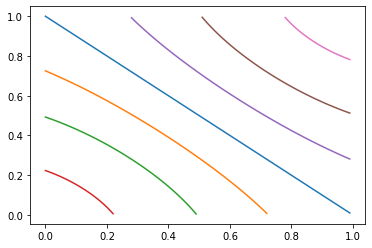

In [8]:
def ensemble_lignes(f) :
    for c in [0, 0.5, 1, 1.5, -0.5, -1, -1.5] :
        X, Y = simple_contour_scan_X(f_enonce, c)
        plt.plot(X,Y)
    plt.show()
        
ensemble_lignes(f_enonce)

On voit que la méthode du scan est tout à fait satisfaisante pour tracer les lignes de niveau de `f_enonce`sur le pavé [0,1]².

**Limites de la méthode du scan :** 
1. Aucune racine n'est trouvée s'il y a plusieurs racines à un y fixé car alors  l'hypothèse *g(a) x g(b) < 0* n'est plus vérifiée.
2. Une racine au maximum est trouvée sur chaque verticale étudiée par le scan. \
Il est donc impossible de tracer une ligne de niveau circulaire dans [0,1]² ou une situation de rebroussement par exemple.

In [3]:
#On affiche la ligne de niveau c=0.16 pour ces deux fonctions continues sur [0,1]². On va voir que :

#Pour cette fonction les hypothèses sont vérifiées, on trace bien la portion du cercle sur [0,1]².
def f_circulaire1 (x,y) :
    return (x-0.5)**2 + y**2
    
#Pour celle-ci la méthode ne fonctionne pas pour les raisons évoquées dans les "limites de la méthode du scan".
def f_circulaire2 (x,y) :
    return x**2 + (y-0.5)**2

#(Affichage)
(X, Y) = simple_contour_scan_X(f_circulaire1, 0.4**2)
(Z, W) = simple_contour_scan_X(f_circulaire2, 0.4**2)
if len(Z)==0 :
    print ("Aucune racine trouvée avec la méthode du scan")
plt.scatter(X,Y)
plt.scatter(Z,W)
X1=np.linspace(-1, 1, 500)
plt.plot([x for x in X1], [0]*len(X1), c="black")
plt.plot([0]*len(X1), [y for y in X1], c="black")
plt.show()

NameError: name 'simple_contour_scan_X' is not defined

**Idées d'améliorations de cette méthode** 
1. Modifier la fonction `find_seed_x0` pour trouver une racine s'il en existe mais que  *g(a) x g(b) > 0* (cf. `find_seed_x0_initiale`programmée pour la méthode des petits carrés.
2. Adapter la fonction `find_seed_x0`pour trouver possiblement plus qu'une racine par verticale.\
\
Nous choisissons d'abandonner cette méthode -qui nous a paru un peu naïve- pour développer une nouvelle idée : la méthode des petits carrés.

## Idée 2 : La méthode des petits carrés 

### Description

**Principe :** Connaissant un point de la ligne de niveau, on trace autour de ce point un carré de côté `2*delta`. On exécute des fonctions de type find_seed sur chacun des quatre bords du carré.\
Afin de toujours avancer dans le bon sens, on met en place un système de mémorisation du côté sur lequel le nouveau point a été trouvé. L'objectif est que le point suivant regarde ce côté-ci en dernier. En effet, c'est sur celui-ci que se trouve le point précédent, le risque serait donc de retrouver ce point-là et de pas avancer... C'est le rôle de la varibale `numcôté` dans nos programmes.

**Contraintes :** Dans `contour_simple`, on regarde une fonction sur le carré [0, 1]². Pour s'assurer de ne pas sortir de ce carré-là, on ajoute des fonctions spéciales qui permettent de :

1) Compter le nombre de côtés dont le point courant est trop proche (ie à une distance inférieure à delta). 
- Dans un coin, cette variable vaut 2. 
- Près d'un côté mais hors d'un coin, elle vaut 1. 
- Ailleurs, elle vaut 0

2) Ajuster les dimensions du "carré" (qui pourra devenir un rectangle...). Si par exemple notre point courant est très proche du bord gauche de notre carré [0, 1]², on déplace le bord gauche de notre petit carré sur la ligne verticale d'abscisse x=0. Ainsi, si le point suivant est trouvé sur ce bord, il sera toujours dans le carré [0, 1]².

**Conditions d'arrêt :** Toujours dans `contour_simple`, nous avons pris comme condition d'arrêt :
- l'arrivée sur un bord.
- un nombre de points donné de la ligne de niveau `n` pris comme paramètre de `contour_simple`\
*NB :* Il est indiqué à la fin de l'exécution de `contour simple`si le programme s'est terminé suite à l'arrivée sur un bord. Dans l'autre cas, il se peut donc que le tracé de la ligne de niveau ne soit pas terminé.

**Validité mathématique du programme :**\
*Sur ]0,1[²*\
On considère une fonction f de [0,1]² dans $\mathbb{R}$, continûment différentiable (cf énoncé). Alors f est en particulier continûment différentiable sur l'ouvert ]0,1[². Soit c un réel de f(]0,1[²).\
On considère la fonction g de [0,1]² dans $\mathbb{R}$ telle que : $\forall$(x,y) $\in$]0,1[² , *g(x,y) = f(x,y) - c* . g est continûment différentiable sur l'ouvert ]0,1[². Comme c $\in$ f(]0,1[²) ,  $\exists$ (x0,y0) $\in$ ]0,1[² tel que g(x0,y0) = 0.\
\
Démontrons l'existence d'une racine (x1,y1) telle que *g(x1,y1) = 0* sur le carré de centre (x0,y0) et de côté $2\delta$ *pour $\delta$ assez petit*.\
\
Nous allons utiliser le théorème des fonctions implicites. Pour cela, il nous manque comme hypothèse l'existence d'une différentielle partielle de g qui soit bijective. Nous allons démontrer cette hypothèse dans le cas particulier de la fonction de l'énoncé `f_enonce` puisqu'il n'y a pas de démonstration possible dans le cas général.\
\
On choisit arbitrairement d'étudier l'inversibilité de la différentielle partielle $\partial_y$g (x et y jouent des rôles symétriques dans l'expression de `f_enonce` et donc de g) sur ]0,1[². Comme g est différentiable, on a, $\forall (x,y)\in\mathbb{R}^2$ :\
$\partial_y g(y,x)= 2[(-2y)e^{-x^2-y^2}+2(y-1)e^{-(x-1)^2-(y-1)^2}]$\
Donc pour la fonction g associée à `f_enonce`, $\partial_y g$ est inversible sur ]0,1[² comme somme de deux fonctions inversibles.\
\
Par le théorème des fonctions implicites, il existe des voisinages ouverts $U$ de x0 et $V$ de y0 tels que $U$ x $V \subset ]0,1[^2$ et une fonction implicite $\psi : U \rightarrow ]0,1[$, continûment différentiable, telle que pour tout $ x\in U$ et tout $y\in V, \quad f(x,y)=0 \Leftrightarrow y=\psi (x)$.Soit $U$, $V$ et $\psi$ de tels objets.\
Montrons par l'absurde que $\exists\delta\neq 0$ tel que $x0 + \delta\in U \quad et\quad \psi (x0+\delta)\in V$. Ainsi, supposons par l'absurde que $\forall\delta\neq0, x0+\delta\in U \Rightarrow \psi(x0+\delta)\notin V$.\
Soit $(\delta_n)_{n\in\mathbb{N}}$ une suite qui tend vers 0 et telle que $\forall n\in\mathbb{N},  x0+\delta_n\in U$. Par continuité de $\psi$ sur $U$ on a : $\lim_{n \to +\infty} \psi(x0+\delta_n)=\psi(x0)$. Or $\psi(x0+\delta_n)\notin V$ et $\psi(x0)\in V$, ce qui est absurde car $V$ est ouvert. Ainsi $\exists\delta\neq 0$ tel que $x0 + \delta\in U \quad et\quad \psi (x0+\delta)\in V$. Pour un tel $\delta$ $g(x0+\delta,\psi(x0+\delta))=0$. Donc $(x0+\delta,\psi(x0+\delta))$ est une racine de g.\
On peut construire deux nouveaux voisinages $U'$ et $V'$ tels que $U'\subset U$, $V'\subset V$, $U'\neq U$, $V'\neq V$ et $\forall x\in U, |x0-x|<\delta$. Sur ces nouveaux voisinages on a :  $ \forall (x,y)\in U$x$V, \quad f(x,y)=0 \Leftrightarrow y=\psi (x)$. On peut montrer comme précédemment que pour $\exists\epsilon\in\mathbb{R}\quad$ tel que : $0<|\epsilon|<|\delta|\quad et\quad g(x0+\epsilon,\psi(x0+\epsilon))=0$.
On peut donc trouver une racine aussi proche que l'on veut de (x0,y0) en réduisant la taille des voisinages.\
On montre donc qu'au voisinage d'une racine, on peut ainsi "construire" un ligne de niveau pour f (correspondant à des racines de g).
On suppose $\delta$ assez petit pour que la ligne de niveau ne soit pas comprise dans le carré de centre (x0,y0) et de côté $2\delta$. Ceci conclue la démonstration de la validité de l'idée du programme développé dans ce projet.



### Place au code

#### De façon générale

Nous présentons ici le programme abouti qui a été généralisé dans l'écriture de son code (les bornes pour x et y peuvent être quelconques tant que f est bien définie sur les intervalles considérés). Il prend pour variables globales :

In [9]:
abscisses=[]
ordonnées=[]
eps = 2**(-26)

#Modifiable par l'utilisateur :
delta=0.01

#Modifiable par l'utilisateur :
valminx=0
valmaxx=1
valminy=0
valmaxy=1

On crée `find_seed_y0`, dans laquelle c'est y qui est fixé à y0 et x qui varie entre valminx et valmaxx. On en aura besoin lors de notre recherche du point suivant sur les quatre bords du petit carré (y compris les bords horizontaux).

In [10]:
def find_seed_y0(f, c, y0, valminx, valmaxx) :  #comme find_seed mais en faisant varier x à y0 fixé
    
    def g(x) :
        return f(x,y0) - c
    
    if g(valminx)*g(valmaxx) > 0 :
        if g(valminx)==0 :
            return valminx
        if g(valmaxx)==0 :
            return valmaxx
        return None
    
    else :
        a, b = valminx, valmaxx
        while b-a >= 2*eps :
            m=(a+b)/2
            if g(m)==0 :
                return m
            if g(m)*g(b) >= 0 :
                b = m
            else :
                a = m
        return (a+b)/2

#### Première étape : trouver une racine sur le bord gauche du carré d'étude (ou "grand carré")

Nous avons codé une nouvelle fonction de recherche de racine pour trouver cette toute première racine `find_seed_x0_initial`. Cette fonction sert à trouver une racine même dans certains cas particuliers où l'hypothèse nécessaire pour la dichotomie n'est pas vérifiée (car présence de deux racines sur le bord gauche par exemple).

In [11]:
def find_seed_x0_initial(f, c, x0, valminy, valmaxy) :   #valmin et valmax sont les bornes entre lesquelles on veut que y varie.
    
    a, b = valminy, valmaxy
    
    def g(y) :
        return f(x0,y) - c
    
    if g(a)*g(b) >= 0 : #hypothèse non vérifiée
        if g(b)==0 :
            return b
        if g(a)==0 :
            return a
        else : #On cherche à se ramener à une situation avec un segment dont les bornes vérifient l'hypothèse g(a)*g(b)<0
            situationbonne=0 # Cette situation recherchée est trouvée (si elle existe) quand situationbonne=1
            if g(b)>0 :
                while situationbonne==0 and a<b :
                    a=a+delta/100
                    if g(a)<0 :
                        situationbonne=1
                if situationbonne==1 :
                    return find_seed_x0(f, c, x0, a, valmaxy)
                else :

                    return None
            if g(b)<0 :
                while situationbonne==0 and a<b :
                    a=a+delta/100
                    if g(a)>0 :
                        situationbonne=1
                if situationbonne==1 :
                    return find_seed_x0(f, c, x0, a, valmaxy)

                else :
                    return None
    while b-a >= 2*eps :
        m = (a+b)/2
        if g(m)==0 :
            return m
        if g(m)*g(b) >= 0 :
            b = m
        else :
            a = m
    return (a+b)/2 #Comme l'intervalle est de taille au plus 2*eps, on renvoit bien le 0 à + ou - eps.

In [12]:
def recherche_initiale_racine (f, c, valminx, valmaxx, valminy, valmaxy) :
    
    #Cherche une racine sur le bord gauche
    racine=find_seed_x0_initial(f, c, valminx, valminy, valmaxy)
    if racine!=None :
        return (valminx,racine)

    #Si l'algorithme ne trouve aucune racine sur les bords
    return (None, None)

#### Deuxième étape : trouver une deuxième racine

Une fois notre premier point trouvé sur le bord gauche, il s'agit de savoir si ce point est dans un coin (ie à une distance inférieur à delta de deux bords) ou pas. 
`test_bord_carre` renvoie ainsi une liste `problemes` de 4 listes, chacune associée à un bord, dont l'indexation est définie comme suit :
* 0 : bord gauche
* 1 : bord haut
* 2 : bord droit
* 3 : bord bas\
Chacune de ces listes contient à la fin 1 ou 2 éléments. S'il n'y en a qu'un, le côté associé est suffisamment éloigné de notre point. S'il y en a 2, alors notre point est trop proche du côté concerné i et se trouve à une distance stockée dans le deuxième élément.

In [13]:
def test_bord_carre(f, x0, y0) :
    '''
    Renvoie simplement la liste probleme qui permet de connaître les côtés problématiques dans le cas initial.
    '''
    dgauche, ddroite, dhaut, dbas = 1, 1, 1, 1
    problemes=[[1]]*4  #problemes = [côté gauche, côté haut, côté droit, côté bas]
    
    if x0<delta : #test distance de la racine au bord gauche du domaine de définition de f
        problemes[0]=[0, x0] #La valeur 0 montre qu'il y a un problème à l'application de la fonction carré_élémentaire simple
    if 1-y0<delta : #test distance de la racine au bord droit du domaine de définition de f
        problemes[1]=[0, 1-y0]
    if 1-x0<delta :
        problemes[2]=[0, 1-x0]
    if y0<delta :
        problemes[3]=[0, y0]
    return problemes

A partir de la liste renvoyée par `test_bord_carre`, la fonction `nombreproblemes`compte le nombre de problèmes rencontrés.

In [14]:
def nombreproblemes(problème) :
    #Renvoie le nombre de bords qui dépassent de l'intervalle de définition
    nbpb=0
    for i in range (len(problème)) :
        if len(problème[i])>1 :
            nbpb+=1
    return nbpb

Il y a nécessairement un problème. Si le point (x0, y0) se trouve sur le bord gauche et pas dans un coin, alors il n'y a qu'un problème : on exécute alors `resolution_1_probleme_initial`. Les arguments `x1` et `x2` sont les abscisses des bords gauche et droit, dans le cas normal elles valent `x0+delta` et `x0-delta`. Idem pour `y1` et `y2` pour les côtés bas et haut.

In [15]:
def resolution_1_probleme_initial(f, c, x0, y0, x1, x2, y1, y2, problème) :
    #(x0,y0) est la première racine trouvée
    # x1, x2, y1 et y2 sont les "bornes" du petit carré d'étude de centre (x0,y0)
    if len(problème[0])>1 :
        x1=x1+problème[0][0]
        L_côté = [1, 2, 3, 0]
    if len(problème[1])>1 :
        y2=y2+problème[1][0]
        L_côté = [2, 3, 0, 1]
    if len(problème[2])>1 :
        x2=x2+problème[2][0]
        L_côté = [3, 0, 1, 2]
    if len(problème[3])>1 :
        y1=y1+problème[3][0]
        L_côté = [0, 1, 2, 3]

    #Cherche une racine sur les bords
    for i in L_côté :
        if i==0 :
            t = find_seed_x0(f, c, x0 = x1, valminy=y1, valmaxy=y2)
            if t != None :
                return (x1, t, i)
            else :
                continue
        if i==1 :
            t = find_seed_y0(f, c, y0 = y2, valminx=x1, valmaxx=x2)
            if t != None :
                return (t, y2, i)
            else :
                continue
        if i==2 :
            t = find_seed_x0(f, c, x0 = x2, valminy=y1, valmaxy=y2)
            if t != None :
                return (x2, t, i)
            else :
                continue
        if i==3 :
            t = find_seed_y0(f, c, y0 = y1, valminx=x1, valmaxx=x2)
            if t != None :
                return (t, y1, i)
            else :
                continue

    #Si aucune racine n'est trouvée sur les bords étudiés
    return(None, None, None)

def simple_contour_carre_initial (f, c, x0, y0) :
    if x0==0 :
        L_côté = [1, 2, 3]
    if y0==0 :
        L_côté = [0, 1, 2]
    if x0==1 :
        L_côté = [3, 1, 2]
    if y0==1 :
        L_côté = [2, 3, 1]

    x1 = x0 - delta   #côté 0
    x2 = x0 + delta   #côté 2
    y1 = y0 - delta   #côté 3
    y2 = y0 + delta   #côté 1

    for i in L_côté :
        if i==0 :
            t = find_seed_x0(f, c, x1, valminy=y1, valmaxy=y2)
            if t != None :
                return (x1, t, i)
        elif i==1 :
            t = find_seed_y0(f, c, y2, valminx=x1, valmaxx=x2)
            if t != None :
                return (t, y2, i)
        elif i==2 :
            t = find_seed_x0(f, c, x2, valminy=y1, valmaxy=y2)
            if t != None :
                return (x2, t, i)
        elif i==3 :
            t = find_seed_y0(f, c, y1, valminx=x1, valmaxx=x2)
            if t != None :
                return (t, y1, i)

    #Si aucune racine n'est trouvée sur les bords étudiés
    return (None, None, None)

Si le point (x0, y0) se trouve dans un coin, il y a 2 problèmes : on exécute alors `resolution_2_problemes_initial`.

In [16]:
def resolution_2_problemes_initial(f, c, x0, y0, problème) :
    x1 = x0 - delta   #côté 0
    x2 = x0 + delta   #côté 2
    y1 = y0 - delta   #côté 3
    y2 = y0 + delta   #côté 1

    #Identification d'un bord posant pb, changement des bornes pour tronquer ce bord et appel de la fonction avec 1 problème en retenant la borne ici changée.

    if len(problème[0])>1 :
        x1=x1+problème[0][0]
        problème[0] = [1]
        return resolution_1_probleme_initial(f, c, x0, y0, x1, y1, x2, y2, problème) #x1 modifié
    if len(problème[1])>1 :
        y2=y1+problème[1][0]
        problème[1] = [1]
        return resolution_1_probleme_initial (f, c, x0, y0, x1, y1, x2, y2, problème) #y2 modifié
    if len(problème[2])>1 :
        x2=x2+problème[2][0]
        problème[2] = [1]
        return resolution_1_probleme_initial (f, c, x0, y0, x1, y1, x2, y2, problème) #x2 modifié
    if len(problème[3])>1 :
        y1=y1+problème[3][0]
        problème[3] = [1]
        return resolution_1_probleme_initial (f, c, x0, y0, x1, y1, x2, y2, problème) #y1 modifié

Une fois `resolution_1_probleme_initial` exécutée (qu'elle ait été appelée par `resolution_2_problemes_initial` ou non), on trouve une deuxième racine. Les coordonnées de cette racine sont stockées dans les listes *abscisses* et *ordonnées*, et on retient le *numcôté* associé à cette racine (cf plus haut pour l'explication du sens et de l'importance de cette varaiable *numcôté*).

#### Troisième étape : Automatisation de la recherche de racines

*Remarque :* Nous allons utiliser dans cette troisième étape des fonctions qui ressemblent beaucoup aux fonctions utilisées dans la deuxième étape  (même principe de fonctionnement) mais qui font intervenir *numcôté*. Nous n'avons pas réussi à réutiliser les mêmes fonctions simplement et avons préféré passer du temps à chercher d'autres méthodes plutôt qu'à optimiser le nombre de fonctions total.\
\
Maintenant, on lance la recherche de tous les autres points tant que les conditions d'arrêt ne sont pas respectées.
On note (x0, y0) le point courant. On commence par regarder les bords dont notre point est trop proche avec `test_bord_carre` et on compte combien de problèmes (0, 1 ou 2) on a rencontré avec `nombreprobleme` comme précédemment.

**Si le nombre de problèmes vaut 0,** alors on exécute la fonction qui s'appliquera le plus souvent : `simple_contour_carre`. Elle cherche le point suivant sur les quatre côtés du petit carré, en terminant par le côté d'où l'on vient. Il est peut-être nécessaire de détailler ici notre raisonnement avec la variable `numcôté`.\
`numcôté` vaut toujours 0, 1, 2 ou 3. Elle représente, du point de vue du point précédent (xx, yy), ie celui à partir duquel on a trouvé (x0, y0), le numéro du côté sur lequel se trouve (x0, y0) avec la numérotation donnée plus haut. Prenons un exemple : si (x0, y0) a été trouvé sur le côté gauche de (xx, yy), alors `numcôté=0`.\
Il s'agit maintenant d'adapter le sens de `numcôté` au point courant (x0, y0). Dans notre exemple, (xx, yy) se trouve, du point de vue du point courant (x0, y0), sur le bord droit ! C'est donc le côté 2 qu'il faut regarder en dernier, d'où la liste `L_côté = [3, 0, 1, 2]`.\
\
Ensuite, on cherche le point suivant sur les 3 premiers côtés de L_côté.
\
Si cependant on ne trouve pas de points, on est obligé de regarder sur le dernier côté, ie le côté sur lequel se trouve (xx, yy). C'est un cas de rebroussement. On traite ce cas séparément car il ne faudrait pas retrouver (xx, yy). On fait alors appel à un find_seed spécial : `find_seed_except`.\
`find_seed_except` exécute deux fois la fonction `find_seed` (à x0 ou y0 fixé, peu importe) : 
1. Sur un premier intervalle de `valmin` jusqu'à `xx-eps` ou `yy-eps` (on rappelle que nos points sont tous déterminés à `eps` près).
2. Sur un deuxième intervalle de `xx+eps` ou `yy+eps` jusqu'à `valmax`.
L'idée est donc d'exclure une petite zone autour de (xx, yy), de longueur `2*eps`, sur laquelle on ne cherche pas le point suivant.\
\
*Remarque* : Si delta est pris suffisamment petit, on ne devrait jamais avoir à exécuter `find_seed_except`, car un rebroussement de la ligne de niveau à si petite échelle est très peu probable si l'on prend une fonction f pas trop exotique...

In [17]:
def simple_contour_carre(f, c, x0, y0, xx, yy, numcôté) :
    '''
    Cas général, ie on suppose que (x0, y0) est à une distance d'au moins delta de tous les bords.
    (x0, y0) est le zéro de la fonction g qu'on vient de trouver
    (xx, yy) est le zéro précédent, ie celui à partir duquel on a trouvé (x0, y0) via numcôté)
    numcôté est, du point de vue du zéro à partir duquel on vient (ie celui à partir duquel on a trouvé (x0,y0)), le numéro du côté par lequel on est sorti pour aller vers (x0,y0).
    0 = vertical gauche
    1 = horizontal haut
    2 = vertical droit
    3 = horizontal bas
    Retourne un couple (les coordonnées du nouveau zéro) et un entier (numcôté, ie le côté par lequel on sort)
    '''
    x1 = x0 - delta  #côté 0
    x2 = x0 + delta  #côté 2
    y1 = y0 - delta   #côté 3
    y2 = y0 + delta   #côté 1
    if numcôté == 0 :
        L_côté = [3, 0, 1, 2]
    elif numcôté == 1 :
        L_côté = [0, 1, 2, 3]
    elif numcôté == 2 :
        L_côté = [1, 2, 3, 0]
    elif numcôté == 3 :
        L_côté = [2, 3, 0, 1]
    for i in [L_côté[i] for i in [0, 1, 2]] :
        if i==0 :
            t = find_seed_x0(f, c, x0 = x1, valminy=y1, valmaxy=y2)
            if t != None :
                return (x1, t, i)
        elif i==1 :
            t = find_seed_y0(f, c, y0 = y2, valminx=x1, valmaxx=x2)
            if t != None :
                return (t, y2, i)
        elif i==2 :
            t = find_seed_x0(f, c, x0 = x2, valminy=y1, valmaxy=y2)
            if t != None :
                return (x2, t, i)
        elif i==3 :
            t = find_seed_y0(f, c, y0 = y1, valminx=x1, valmaxx=x2)
            if t != None :
                return (t, y1, i)
    dernier_côté = numcôté
    #On passe au dernier côté : ça se complique car notre find_seed va nous renvoyer le même zéro que celui d'où on vient. On va faire une dichotomie sur deux intervalles formés en excluant une petite zone (de taille 2*eps) autour de notre ancien zéro.
    if dernier_côté in [0, 2] :
        valmin, valmax = x1, x2
        t = find_seed_except(f, c, valmin, valmax, xx, yy, dernier_côté)
        if t != None :
            return (xx, t, dernier_côté)
    elif dernier_côté in [1, 3] :
        valmin, valmax = y1, y2
        t = find_seed_except(f, c, valmin, valmax, xx, yy, dernier_côté)
        if t != None :
            return (t, yy, dernier_côté)
    return None


def find_seed_except(f, c, valmin, valmax, xx, yy, numcôté) :
    '''
    C'est un find_seed spécial qui s'applique lors des rebroussements, ie lorsqu'on ressort par le côté d'où on est entré.
    Il va en fait chercher un nouveau zéro sur deux intervalles obtenus en excluant une petite zone (de longueur 2*eps) autour de notre ancien zéro (xx, yy).
    '''
    if numcôté in [0,2] :  #c'est y qui bouge, x fixé à xx
        valmin1, valmax1 = valmin, xx-eps
        valmin2, valmax2 = xx+eps, valmax
        t = find_seed_x0(f, c, x0=xx, valminy=valmin1, valmaxy=valmax1)
        tt = find_seed_x0(f, c, x0=xx, valminy=valmin2, valmaxy=valmax2)
        if t != None :
            return t
        if tt != None :
            return  tt
    else :   #x bouge, y fixé à yy
        valmin1, valmax1 = valmin, yy-eps
        valmin2, valmax2 = yy+eps, valmax
        t = find_seed_y0(f, c, y0=yy, valminx=valmin1, valmaxx=valmax1)
        tt = find_seed_y0(f, c, y0=yy, valminx=valmin2, valmaxx=valmax2)
        if t != None :
            return t
        if tt != None :
            return  tt
    return None

**Si le nombre de problème vaut 1,** alors on exécute `resolution_1_probleme`. L'idée est la même que dans `resolution_1_probleme_initial`, on traite seulement le cas de rebroussement en plus, de la même façon que dans `simple_contour_carre`.

In [18]:
def resolution_1_probleme (f, c, x0, y0, problème, numcôté, xx, yy, x1, x2, y1, y2) :
    if len(problème[0])>1 :
        x1=x1+problème[0][0]
    if len(problème[1])>1 :
        y2=y2-problème[1][0]
    if len(problème[2])>1 :
        x2=x2-problème[2][0]
    if len(problème[3])>1 :
        y1=y1+problème[3][0]

    #On prend en compte la valeur de numcôté pour traiter le côté concerné par numcôté en dernier.
    if numcôté==0 :
        L_côté = [3, 0, 1, 2]
    if numcôté==1 :
        L_côté = [0, 1, 2, 3]
    if numcôté==2 :
        L_côté = [1, 2, 3, 0]
    if numcôté==3 :
        L_côté = [2, 3, 0, 1]


    #Cherche des racines sur les bords (possiblement tronqués) qui ne font pas intervenir numcôté
    for i in L_côté[0:3] :
        if i==0 :
            t = find_seed_x0(f, c, x0 = x1, valminy=y1, valmaxy=y2)
            if t != None :
                return (x1, t, i)
        elif i==1 :
            t = find_seed_y0(f, c, y0 = y2, valminx=x1, valmaxx=x2)
            if t != None :
                return (t, y2, i)
        elif i==2 :
            t = find_seed_x0(f, c, x0 = x2, valminy=y1, valmaxy=y2)
            if t != None :
                return (x2, t, i)
        elif i==3 :
            t = find_seed_y0(f, c, y0 = y1, valminx=x1, valmaxx=x2)
            if t != None :
                return (t, y1, i)

    #Teste le dernier côté où la racine précédente a été exclue
    i=L_côté[3]
    if i==0 :
        t = find_seed_except(f, c, y1, y2, xx, yy, numcôté)
        if t != None :
            return (x1, t, i)
    elif i==1 :
        t = find_seed_except(f, c, x1, x2, xx, yy, numcôté)
        if t != None :
            return (t, y2, i)
    elif i==2 :
        t = find_seed_except(f, c, y1, y2, xx, yy, numcôté)
        if t != None :
            return (x2, t, i)
    elif i==3 :
        t = find_seed_except(f, c, x1, x2, xx, yy, numcôté)
        if t != None :
            return (t, y1, i)

    #Si aucune racine n'est trouvée sur les bords étudiés
    return (None, None, None)

**Si le nombre de problèmes vaut 2,** alors on exécute `resolution_2_problemes`. L'idée est d'exécuter `resolution_1_probleme`en ayant réajuster un des côtés du carré, de sorte qu'on se ramène à un cas où il n'y a plus que 1 problème. On n'oublie pas au passage de spécifier qu'il n'y a plus de problème sur le côté qu'on vient de modifier dans la liste `problème`.

In [19]:
def resolution_2_problemes(f, c, x0, y0, problème, numcôté, xx, yy) :
    x1 = x0 - delta   #côté 0
    x2 = x0 + delta   #côté 2
    y1 = y0 - delta   #côté 3
    y2 = y0 + delta   #côté 1

    #Identification d'un bord posant pb, changement des bornes pour tronquer ce bord et appel de la fonction avec 1 problème en retenant la nouvelle borne.
    if len(problème[0])>1 :
        x1=x1+problème[0][0]
        problème[0] = [1]
        return resolution_1_probleme(f, c, x0, y0, problème, numcôté, xx, yy, x1, x2, y1, y2=y0+delta) #x1 modifié
    if len(problème[1])>1 :
        y2=y2-problème[1][0]
        problème[1] = [1]
        return resolution_1_probleme(f, c, x0, y0, problème, numcôté, xx, yy, x1, x2, y1, y2) #y2 modifié
    if len(problème[2])>1 :
        x2=x2-problème[2][0]
        problème[2] = [1]
        return resolution_1_probleme(f, c, x0, y0, problème, numcôté, xx, yy, x1, x2, y1, y2) #x2 modifié
    if len(problème[3])>1 :
        y1=y1+problème[3][0]
        problème[3] = [1]
        return resolution_1_probleme(f, c, x0, y0, problème, numcôté, xx, yy, x1, x2, y1, y2) #y1 modifié

#### Quatrième étape : relier les fonctions entre elles ou coder la fonction englobante

Il ne nous reste plus qu'à construire la structure globale de notre fonction `contour_simple_carre` en appelant toutes les fonctions précédentes.

In [20]:
def contour_simple_carre(f, c, n) :   #n est le nombre de points maximal qu'on accepte de tracer.
    '''
    Affiche la ligne de niveau de la fonction f pour la valeur c.
    delta est l'espacement approximatif entre les points qui composent cette ligne.
    eps correspond à l'incertitude sur ces points, ie les valeurs sont justes à + ou - eps.
    '''
    abscisses = []
    ordonnées = []
    fin=0

    if n<2 :
        raise ValueError ("Veuillez entrer un nombre de points >=2")

    #1- On trouve un premier point de la ligne
    (xx, yy) = recherche_initiale_racine(f, c, valminx, valmaxx, valminy, valmaxy)
    if xx!=None :
        abscisses.append(xx)
        ordonnées.append(yy)
    else :
        return np.array([]), np.array([])  #Pas de points de la ligne sur ce bord.

    #2- On trouve un deuxième point de la ligne de niveau à partir du premier
    problemes = test_bord_carre(f, xx, yy)
    nbpb = nombreproblemes(problemes)
    if nbpb == 1:
        (x0, y0, numcôté) = resolution_1_probleme_initial(f, c, xx, yy, xx-delta, xx+delta, yy-delta, yy+delta, problemes)
    elif nbpb == 2 :
        (x0, y0, numcôté) = resolution_2_problemes_initial(f, c, xx, yy, problemes)
    else :
        return np.array([]), np.array([])   #On décide ne pas renvoyer le premier point seul. Ce cas n'arrive jamais normalement.

    if x0 != None and y0 != None :
        abscisses.append(x0)
        ordonnées.append(y0)
    else :
        return np.array([]), np.array([])

    #3- Recherche de n points supplémentaires de la ligne
    i=2 #compteur de boucle
    while fin==0 and i<n :
        problemes = test_bord_carre(f, x0, y0)
        xx, yy , xxx, yyy = x0, y0, xx, yy
        if problemes == [[1]]*4 :    #Il n'y a pas de problème : on est suffisamment éloigné de tous les bords
            (x0, y0, numcôté) = simple_contour_carre(f, c, xx, yy, xxx, yyy, numcôté)
            if x0 != None and y0 != None :
                abscisses.append(x0)
                ordonnées.append(y0)
                if x0<=valminx or x0>=valmaxx or y0<=valminy or y0>=valmaxy :
                    fin=1 #On sort du grand carré d'étude, on s'arrête là.
        else :
            nbpb = nombreproblemes(problemes)
            if nbpb == 1 :
                (x0, y0, numcôté) = resolution_1_probleme(f, c, xx, yy, problemes, numcôté, xxx, yyy, x0 - delta, x0 + delta, y0 - delta, y0 + delta)
                if x0 != None and y0 != None :
                    abscisses.append(x0)
                    ordonnées.append(y0)
                    if x0<=valminx or x0>=valmaxx or y0<=valminy or y0>=valmaxy :
                        fin=1
                else :
                    return np.array(abscisses), np.array(ordonnées) #La recherche d'une racine sur les bords du carré n'a pas abouti à ce stade. On renvoie les points qu'on a trouvé jusqu'à présent.
            elif nbpb == 2 :
                (x0, y0, numcôté) = resolution_2_problemes(f, c, xx, yy, problemes, numcôté, xxx, yyy)
                if x0 != None and y0 != None :
                    abscisses.append(x0)
                    ordonnées.append(y0)
                    if x0<=valminx or x0>=valmaxx or y0<=valminy or y0>=valmaxy :
                        fin=1
                else :
                    return np.array(abscisses), np.array(ordonnées)
            else :
                return np.array(abscisses), np.array(ordonnées) #Le nombre de problèmes a depassé 2.
        i+=1

    if fin==1 :
        print (f"La courbe de niveau (c={c}) a été finie d'être dessinée sur ce carré.")
        abscisses.pop()
        ordonnées.pop()
    elif fin==0 :
        print (f"La courbe de niveau (c={c}) n'a pas été finie d'être dessinée sur ce carré.")
        
    #4- Le retour
    return np.array(abscisses), np.array(ordonnées)


On vérifie que ce programme fonctionne avec la fonction de l'énoncé sur  [0, 1]².

La courbe de niveau (c=0) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.5) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=1) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=1.5) a été finie d'être dessinée sur ce carré.


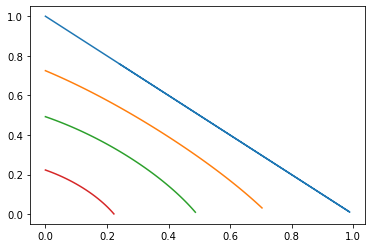

In [21]:
#On rappelle les variables globales
abscisses=[]
ordonnées=[]
eps = 2**(-26)

#Modifiable par l'utilisateur :
delta=0.011

#Modifiable par l'utilisateur :
valminx=0
valmaxx=1
valminy=0
valmaxy=1

def affichage_simple_carre (f_enonce, C, n) : #Tracé simultané de plusieurs lignes de niveau
    for c in C :
        abscisses, ordonnées = contour_simple_carre(f_enonce, c, n)
        plt.plot(abscisses, ordonnées)
    plt.show()

affichage_simple_carre(f_enonce, [0, 0.5, 1, 1.5], 30) 

La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.5) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=1) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=1.5) a été finie d'être dessinée sur ce carré.


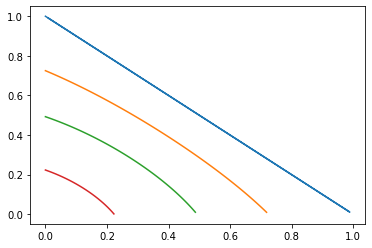

In [22]:
# On voit qu'en augmentant le nombre de points, toutes les lignes sont complètes : notre condition d'arrêt est 
# toujours la sortie du carré et non plus le nombre de points choisi arbitrairement par l'utilisateur.
# NB : le nombre de points n minimal permettant que la seule condition d'arrêt appliquée soit la sortie du grand carré 
#      est fonction décroissante de delta.
affichage_simple_carre(f_enonce, [0, 0.5, 1, 1.5], 150)

## Idée 3 : la méthode des petits cercles

### Idée

Nous avons souhaité coder une méthode utilisant le gradient. En effet l'outil gradient pourrait nous orienter (dans l'espace 2D ici considéré) plus rapidement vers une racine à environ delta d'une racine précédemment trouvée.\
C'est aussi dans le souci de trouver un programme faisant intervenir moins de fonctions que la méthode des petits carrés que nous avons développé cette méthode.

### Description

**Principe :** Cette méthode, qui ne fait plus intervenir `find_seed` (sauf pour trouver la toute première racine), consiste à évaluer la fonction f sur un cercle de rayon delta tracé autour du point courant. Autrement dit, pour chaque point de la ligne de niveau, on trouve le point suivant en calculant les valeurs prises par f sur un nombre important de points situés à delta du point courant. Tous les points de ce cercle sont paramétrés par un seul angle theta.

**Gradient :** On peut améliorer cette première méthode en utlisant le gradient de la fonction au niveau du point courant. En effet, la ligne de niveau est tangente au gradient. En construisant un vecteur normal au gradient (orienté dans un direction arbitraire), on trouve une direction privilégiée. Nous considérons que les chances de trouver le point suivant sont maximales dans la direction donnée par ce vecteur. On commence donc par balayer les points qui sont proches de cette direction, et on s'éloigne jusqu'à avoir parcouru tout le cercle. On optimise ainsi le temps de recherche du point suivant.

**Condition d'arrêt :** On utilisera les conditions d'arrêt suivantes :
* La ligne de niveau atteint un bord : si le quadrillage final (dans `contour`) est suffisamment fin, on ne devrait pas trouver deux lignes de niveau pour une même valeur dans une cellule.
* Le nombre de points trouvé a dépassé 200. Dans une cellule de taille 1, cela correspond à avoir parcouru deux fois la distance sur un côté.
* Avant d'avoir atteint cette limite, le point suivant n'a pas pu être trouver (parce que la discrétisation en théta n'était pas assez fine,etc...). On renvoie alors la liste des points déjà trouvés, à défaut - peut-être - d'avoir la ligne complète.

**Validité mathématique du programme :**\
On se ramène à l'explication pour la méthode des petits carrés.

### Place au code

#### Première étape : les fonctions auxiliaires

On aura besoin dans la suite de nombreuses fonctions auxiliaires que l'on présente ici.
* `find_seed` : on utilise la même que précédemment, pour trouver le premier point sur le bord gauche du carré.
* `point_courant` : passage des coordonnées polaires aux coordonnées cartésiennes afin d'évaluer la fonction f en le point de recherche courant (connaissant son angle theta par rapport à l'horizontale)
* `gradient` : renvoie les coodonnées du gradient de la fonction f en `(x, y)` en utilisant la fonction `grad` du module `autograd`.
* `vecteur_normal_droite` : construit un vecteur normé normal au gradient. L'adjectif "droite" signifie simplement que, lorsque le gradient est orienté vers le haut, le vecteur construit est arbitrairement orienté vers la droite. En réalité, ce choix n'est pas si arbitraire que ça car il revient à dire que l'on décide de parcourir la ligne de niveau de la gauche vers la droite, ce qui paraît "cohérent" sachant que l'on part du côté gauche.
* `second_point` : permet simplement de trouver le second point de la ligne de niveau connaissant le premier trouvé sur le bord gauche. On parcourt tous les angles de $-\pi/2$ à $+\pi/2$.
* `test_bord` : renvoie 1 si le point qu'on vient de trouver est sorti du carré [0, 1]². Cette fonction est utilisée en tant que condition d'arrêt, car elle signifie que la ligne de niveau a attein un bord.
* `iterateur_theta` : construit un itérateur qui balaye les angles theta en partant de la direction donnée par theta0 (ie la direction donnée par vecteur_normal_droite dans le programme global). La fonction crée des arc-de-cercles de longueur angulaire $\pi/10\$ répartis autour de la direction de référence.

In [21]:
def find_seed(f, c, x0=0, min=0, max=1) :   #valmin et valmax sont les bornes entre lesquelles on veut que y varie.
    a, b = min, max
    def g(y) :
        return f(x0, y) - c
    if g(a)*g(b) > 0 : #dans ce cas, notre hypothèse n'est pas vérifiée.
        return None
    if g(b)==0 :
        return b
    if g(a)==0 :
        return a
    while abs(b-a) > 2*eps :
        m = (a+b)/2
        if g(m)*g(b) >= 0 :
            b = m
        else :
            a = m
    return (a+b)/2 #Comme l'intervalle est de taille au plus 2*eps, on renvoit bien le 0 à + ou - eps.

In [22]:
def point_courant(x0, y0, theta, delta) :
    '''
    Connaissant l'angle theta du point courant par rapport à l'horizontale, retourne ses coordonnées cartésiennes
    '''
    return (x0 + delta*np.cos(theta), y0 + delta*np.sin(theta))

In [23]:
def gradient(f, x, y) :
    '''
    Renvoie les coordonnées du gradient de la fonction f en (x,y) sous forme d'un tableau numpy.
    '''
    g = autograd.grad
    return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])

In [24]:
def vecteur_normal_droite(grad) :
    '''
    Renvoie les coordonnées d'un vecteur normé orthogonal au gradient de f en (x,y) 'orienté vers la droite', ie dans le sens de parcours de la ligne de niveau.
    Si le gradient est nul en (x,y), renvoie np.array([None, None]).
    '''
    g1, g2 = grad[0], grad[1]
    norme=np.linalg.norm(grad)
    if norme==0 :    # La gradient est nul en (x,y)
        return np.array([None, None])
    vecteur_normal = (1/norme) * np.array([g2, -g1])
    return vecteur_normal

In [25]:
def second_point(f, c, x0, y0, delta) :
    '''
    Renvoie les coordonnées du deuxième point de la ligne de niveau, connaissant celui déjà trouvé avec find_seed (x0, y0).
    Renvoie (None, None) si aucun point n'est trouvé.
    '''
    L_theta = np.linspace(-np.pi/2, np.pi/2, 5000)  #on cherche le deuxième point sur le demi-cercle de droite
    for theta in L_theta :
        (x, y) = point_courant(x0, y0, theta, delta)
        if abs(f(x,y) - c) < eps :
            return (x,y)
    return (None, None)

In [26]:
def test_bord(x0, y0, delta) :
    '''
    Permet de savoir si le point courant est à l'extérieur du carré [0, 1]²
    Renvoie 1 si c'est le cas, 0 sinon.
    '''
    if x0 < 0 or y0 < 0 or x0 > 1 or y0 > 1 :
        return 1
    return 0

In [27]:
def iterateur_theta(theta0) :
    '''
    Renvoie un itérateur qui permet de parcourir les theta intelligement autour de theta0. On suppose en effet que les chances de trouver le point suivant sont maximales autour de la direction donnée par vecteur_normal_droite.
    '''
    L_theta_1 = np.linspace(theta0 - np.pi/10, theta0 + np.pi/10, 1000)
    L_theta_2 = itertools.chain(np.linspace(theta0 - np.pi/10, theta0 - 2*np.pi/10, 500), np.linspace(theta0 + np.pi/10, theta0 + 2*np.pi/10, 500))
    L_theta_3 = itertools.chain(np.linspace(theta0 - 2*np.pi/10, theta0 - 3*np.pi/10, 500), np.linspace(theta0 + 2*np.pi/10, theta0 + 3*np.pi/10, 500))
    L_theta_4 = itertools.chain(np.linspace(theta0 - 3*np.pi/10, theta0 - 4*np.pi/10, 500), np.linspace(theta0 + 3*np.pi/10, theta0 + 4*np.pi/10, 500))
    L_theta_5 = itertools.chain(np.linspace(theta0 - 4*np.pi/10, theta0 - 5*np.pi/10, 500), np.linspace(theta0 + 4*np.pi/10, theta0 + 5*np.pi/10, 500))
    L_theta_6 = itertools.chain(np.linspace(theta0 - 5*np.pi/10, theta0 - 6*np.pi/10, 500), np.linspace(theta0 + 5*np.pi/10, theta0 + 6*np.pi/10, 500))
    L_theta_7 = itertools.chain(np.linspace(theta0 - 6*np.pi/10, theta0 - 7*np.pi/10, 500), np.linspace(theta0 + 6*np.pi/10, theta0 + 7*np.pi/10, 500))
    L_theta_8 = itertools.chain(np.linspace(theta0 - 7*np.pi/10, theta0 - 8*np.pi/10, 500), np.linspace(theta0 + 7*np.pi/10, theta0 + 8*np.pi/10, 500))
    L_theta_9 = itertools.chain(np.linspace(theta0 - 8*np.pi/10, theta0 - 9*np.pi/10, 500), np.linspace(theta0 + 8*np.pi/10, theta0 + 9*np.pi/10, 500))
    L_theta_10 = itertools.chain(np.linspace(theta0 - 9*np.pi/10, theta0 - 10*np.pi/10, 500), np.linspace(theta0 + 9*np.pi/10, theta0 + 10*np.pi/10, 500))
    return itertools.chain(L_theta_1, L_theta_2, L_theta_3, L_theta_4, L_theta_5, L_theta_6, L_theta_7, L_theta_8, L_theta_9, L_theta_10)

#### Deuxième étape : `simple_contour_cercle`

*Quelques remarques :*
* On d'afficher quelques messages qui donnent une idée de l'avancement du programme.
* On discrétise le petit cercle autour de `(x0, y0)` en 10.000 points, ie on le parcourt avec un pas de $2\pi/10.000$.
* On a besoin, dans notre programme, de vérifier qu'on ne trouve pas toujours les mêmes points. En effet, dans notre parcourt du petit cercle, rien n'empêche de retomber sur le point precédent ! On décide donc de comparer le point trouvé aux deux derniers de la ligne (c'est arbitraire, nous estimons qu'il est peu probable qu'on en rencontre plus dans une si petite zone), avec une marge de eps.
* On rajoute à la fin une fonction d'affichage de notre courbe.

In [56]:
eps = 10**(-4)    #on doit abaisser un peu la précision pour que la méthode des cercles fonctionne avec un nombre "décent" de points de recherche.
def contour_simple_cercle(f, c=0.0, delta=0.01) :
    #1- Chercher un point de la ligne de niveau sur le côté gauche
    abscisses = []
    ordonnées = []
    xx = 0
    yy = find_seed(f, c)
    if yy==None :
        return np.array([]), np.array([])  #impossible de construire la ligne de niveau.
    else :
        abscisses.append(xx)
        ordonnées.append(yy)

    #2- Chercher un deuxième point dans le demi-cercle droit autour du premier point
    (x0, y0) = second_point(f, c, xx, yy, delta)
    if (x0, y0) == (None, None) :
        return np.array([]), np.array([])   
    else :
        abscisses.append(x0)
        ordonnées.append(y0)
    #3- Recherche des points suivants
    n=200     #nombre max de points
    for i in range(n) :
        if test_bord(x0, y0, delta) == 1 :
            abscisses.pop()   #le point est à l'extérieur du carré d'étude : on le retire de notre liste.
            ordonnées.pop()
            print(f"La recherche de cette ligne de niveau (c={c}) est finie !")
            break
        grad = gradient(f, x0, y0)
        if np.linalg.norm(grad) == 0 :  #on est tombé sur un point critique. Aucune direction n'est privilégiée. En pratique, ce cas ne devrait presque jamais arriver car il est très improbable que le gradient soit exactement nul sur un point donné.
            print('Le gradient est nul')
            iterateur = np.linspace(-np.pi, np.pi, 10000)
        else :
            vecteur_normal = delta*vecteur_normal_droite(grad)   #vecteur_normal de norme delta
            x, y = vecteur_normal[0], vecteur_normal[1]
            theta0 = 2*np.arctan(y / x + np.sqrt(x**2 + y**2))  #theta0 permet de définir la direction donnée par vecteur_normal.
            iterateur = iterateur_theta(theta0)
        for theta in iterateur_theta(theta0) :
            (x, y) = point_courant(x0, y0, theta, delta)
            if abs(f(x,y) - c) < eps :   #(x, y) est peut-être le prochaine point de notre ligne...
                if abs(x-abscisses[-1]) > eps and abs(y-ordonnées[-1]) > eps and abs(x-abscisses[-2]) > eps and abs(y-ordonnées[-2]) > eps : #... sauf si c'est le dernier ou l'avant dernier point de la ligne ! (à eps près)
                    abscisses.append(x)
                    ordonnées.append(y)
                    x0, y0 = x, y   #(x, y) est notre nouveau point courant, on arrête de parcourir les theta.
                    break
                else :    #on a déjà trouvé (x, y)
                    continue   #on continue à parcourir les theta en espérant trouver un nouveau point de la ligne...
        else :  #le else n'est exécuté que si on ne sort par de la boucle for avec un break. Cela signifie qu'on n'a pas trouvé de nouveau point de la ligne autour de (x0, y0).
            print("Impossible de trouver le point suivant !")
            return np.array(abscisses), np.array(ordonnées)  #On décide donc de renvoyer les points qu'on a déjà trouvé, même s'il en manque sans doute...
    else :
        print("Le nombre de points maximal a été atteint !")

    #4- Retourner les coordonnées des points trouvés
    return np.array(abscisses), np.array(ordonnées)

In [ ]:
def affichage_simple_cercle(f, niveaux) :  #niveaux est la liste des courbes de niveaux qu'on veut tracer.
    for i in niveaux :
        abscisses, ordonnées = contour_simple_cercle(f, i, 0.01)
        plt.plot(abscisses, ordonnées)
    plt.show()
affichage_simple_cercle(f_enonce, [0, 0.5, 1, 1.5])
# Remarque : on trouve déjà des temps d'exécution bien plus important que pour la méthode de carrés simples...

## La fonction `contour_complexe`

**Principe** On quadrille le domaine de définition de f en celulles selon les arguments xc et yc. Or, `simple_contour` (comme nom général pour les trois fonctions codées ci-dessus associées aux trois méthodes développées) ne s'applique que sur des fonctions définies sur [0, 1]²(NB : la méthode des petits carrés peut en fait être exécutée sur tout pavé [a,b] x [c,d] avec a, b, c et d réels mais pour uniformiser les fonctions `contour_complexe`nous n'avons pas profité de cela) : on "dilate" donc f via `f_dilatee`, qui est elle définie sur [0, 1]². \
On cherche ensuite un bord d'où peut partir la ligne de niveau. Pour ce faire, on fait "pivoter" la fonction f de $\pi/2$ quatre fois, de sorte que chaque bord se retrouve l'un après l'autre sur le bord gauche. A chaque fois, on applique `simple_contour`.
* Si l'ensemble des points renvoyé n'est pas vide, on applique l'opération de pivotage inverse de sorte à retrouver les abscisses et les ordonnées correspondant à f_dilatée.
* Sinon, on passe au bord suivant.
* S'il n'y a plus de bord à tester, on renvoie un tableau vide : la ligne de niveau soit n'est pas présente dans cette cellule, soit ne coupe aucun des bords. Notons que ce dernier cas peut être evité en maillant suffisamment finement la zone de définition.

Finalement, on redécale les abscisses et les ordonnées trouvées vers la celulle de travail initiale. On peut alors renvoyer les listes ainsi construites.\
\
On construit une fonction `contour_complexe` pour chacune des trois méthodes que nous avons proposées.

### `contour_complexe_carre`

In [23]:
def contour_complexe_carre(f, c=0.0, xc=[0.0, 1.0], yc=[0.0, 1.0], delta=0.01, n=70) : #Rappel : n est le nombre de points maximal qu'on accepte de tracer par celulle.
    nx, ny = len(xc), len(yc)
    xs = []
    ys = []
    for i in range(nx-1) :
        for j in range(ny-1) :
            x0, x1 = xc[i], xc[i+1]  #les bornes en x de la cellule
            y0, y1 = yc[j], yc[j+1]  #les bornes en y de la cellule

            def f_dilatee(x, y) :  #on "dilate" f pour qu'elle soit définie sur [O, 1]²
                return f(x0 + (x1 - x0)*x, y0 + (y1 - y0)*y)
            def g_haut(x, y) :
                return f_dilatee(y, 1-x) #fonction f_dilatee pivotée de +pi/2 : le bord du haut devient le bord gauche
            def g_droit(x, y) :
                return f_dilatee(1-x, 1-y)  #fonction f_dilatee pivotée de +pi : le bord droit devient le bord gauche
            def g_bas(x, y) :
                return f_dilatee(1-y, x)  #fonction f_dilatee pivotée de +3*pi/2 : le bord du bas devient le bord gauche

            abscisses, ordonnées = contour_simple_carre(f_dilatee, c, n)   #BORD GAUCHE
            if abscisses.size!=0 : #on a alors aussi forcément ordonnées.size!=0
                abscisses_rot, ordonnées_rot = abscisses, ordonnées
            else :
                abscisses, ordonnées = contour_simple_carre(g_haut, c, n) #BORD HAUT
                if abscisses.size!=0 :
                    abscisses_rot, ordonnées_rot = ordonnées, 1-abscisses
                else :
                    abscisses, ordonnées = contour_simple_carre(g_droit, c, n)   #BORD DROIT
                    if abscisses.size!=0 :
                        abscisses_rot, ordonnées_rot = 1-abscisses, 1-ordonnées
                    else :
                        abscisses, ordonnées = contour_simple_carre(g_bas, c, n)    #BORD BAS
                        if abscisses.size!=0 :
                            abscisses_rot, ordonnées_rot = 1-ordonnées, abscisses
                        else :   #la ligne de niveau ne coupe aucun des bords du carré
                            abscisses_rot, ordonnées_rot = np.array([]), np.array([])
            abscisses_décalées = x0 + (x1 - x0)*abscisses_rot  #compression
            ordonnées_décalées = y0 + (y1 - y0)*ordonnées_rot
            xs.append(abscisses_décalées)
            ys.append(ordonnées_décalées)
    return xs, ys   #renvoie deux listes vides si f ne prend pas la valeur c sur xc x yc

La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être des

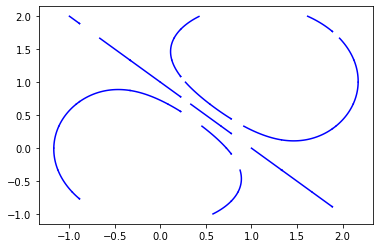

In [24]:
def affichage_complexe_carre(f, niveaux=[0.0], xc=[0.0, 1.0], yc=[0.0, 1.0], delta=0.011, n=70) :
    for c in niveaux :
        abscisses, ordonnées = contour_complexe_carre(f, c, xc, yc, delta, n)
        for X, Y in zip(abscisses, ordonnées) :
            plt.plot(X, Y, 'b')     #si les tables X et Y sont vides, aucun point n'est affiché.
    plt.show()
affichage_complexe_carre(f_enonce, [0, -0.5, 0.5], xc = np.linspace(-2, 3, 10), yc = np.linspace(-1, 2, 10), n=150)
#Rq : avec n=70, toutes les courbes ne sont pas complètes et on trouve des trous dans notre figure finale.
# avec n=150, toutes les courbes sont tracées, on obtient moins de trous mais il en reste quelques-uns malgré tout...

### `contour_complexe_cercle`

In [58]:
def contour_complexe_cercle(f, c=0.0, xc=[0.0, 1.0], yc=[0.0, 1.0], delta=0.01) : #Rappel : n est le nombre de points maximal qu'on accepte de tracer par celulle.
    nx, ny = len(xc), len(yc)
    xs = []
    ys = []
    for i in range(nx-1) :
        for j in range(ny-1) :
            x0, x1 = xc[i], xc[i+1]  #les bornes en x de la cellule
            y0, y1 = yc[j], yc[j+1]  #les bornes en y de la cellule

            def f_dilatee(x, y) :  #on "dilate" f pour qu'elle soit définie sur [O, 1]²
                return f(x0 + (x1 - x0)*x, y0 + (y1 - y0)*y)
            def g_haut(x, y) :
                return f_dilatee(y, 1-x) #fonction f_dilatee pivotée de +pi/2 : le bord du haut devient le bord gauche
            def g_droit(x, y) :
                return f_dilatee(1-x, 1-y)  #fonction f_dilatee pivotée de +pi : le bord droit devient le bord gauche
            def g_bas(x, y) :
                return f_dilatee(1-y, x)  #fonction f_dilatee pivotée de +3*pi/2 : le bord du bas devient le bord gauche

            abscisses, ordonnées = contour_simple_cercle(f_dilatee, c)   #BORD GAUCHE
            if abscisses.size!=0 : #on a alors aussi forcément ordonnées.size!=0
                abscisses_rot, ordonnées_rot = abscisses, ordonnées
            else :
                abscisses, ordonnées = contour_simple_cercle(g_haut, c) #BORD HAUT
                if abscisses.size!=0 :
                    abscisses_rot, ordonnées_rot = ordonnées, 1-abscisses
                else :
                    abscisses, ordonnées = contour_simple_cercle(g_droit, c)   #BORD DROIT
                    if abscisses.size!=0 :
                        abscisses_rot, ordonnées_rot = 1-abscisses, 1-ordonnées
                    else :
                        abscisses, ordonnées = contour_simple_cercle(g_bas, c)    #BORD BAS
                        if abscisses.size!=0 :
                            abscisses_rot, ordonnées_rot = 1-ordonnées, abscisses
                        else :   #la ligne de niveau ne coupe aucun des bords du carré
                            abscisses_rot, ordonnées_rot = np.array([]), np.array([])
            abscisses_décalées = x0 + (x1 - x0)*abscisses_rot  #compression
            ordonnées_décalées = y0 + (y1 - y0)*ordonnées_rot
            xs.append(abscisses_décalées)
            ys.append(ordonnées_décalées)
    return xs, ys   #renvoie deux listes vides si f ne prend pas la valeur c sur xc x yc

La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=0) est finie !
La recherche de cette ligne de niveau (c=-0.5) est finie !
Impossible de trouver le point suivant !
La r

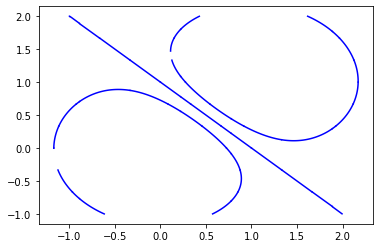

In [59]:
def affichage_complexe_cercle(f, niveaux=[0.0], xc=[0.0, 1.0], yc=[0.0, 1.0], delta=0.01) :
    for c in niveaux :
        abscisses, ordonnées = contour_complexe_cercle(f, c, xc, yc, delta)
        for X, Y in zip(abscisses, ordonnées) :
            plt.plot(X, Y, 'b')     #si les tables X et Y sont vides, aucun point n'est affiché.
    plt.show()

affichage_complexe_cercle(f_enonce, [0, -0.5, 0.5], xc = np.linspace(-2, 3, 10), yc = np.linspace(-1, 2, 10))

### `contour` déposé sur Discourse

In [27]:
##Contour complexe
# Rotators
# ------------------------------------------------------------------------------
LEFT, UP, RIGHT, DOWN = 0, 1, 2, 3  # clockwise


def rotate_direction(direction, m=1):
    return (direction + m) % 4


def rotate(x, y, m=1):
    if m == 0:
        return x, y
    elif m >= 1:
        return rotate(1 - y, x, m - 1)
    else:
        assert m < 0
        return rotate(x, y, m=-3 * m)


def rotate_function(f, m=1):
    def rotated_function(x, y):
        xr, yr = rotate(x, y, -m)
        return f(xr, yr)

    return rotated_function


# Complex Contouring
# ------------------------------------------------------------------------------

# Customize the simple_contour function used in contour :
# simple_contour = smart_simple_contour


def contour(f, c, xs=[0.0, 1.0], ys=[0.0, 1.0], delta=0.01):
    curves = []
    nx, ny = len(xs), len(ys)
    for i in range(nx - 1):
        for j in range(ny - 1):
            xmin, xmax = xs[i], xs[i + 1]
            ymin, ymax = ys[j], ys[j + 1]

            def f_cell(x, y):
                return f(xmin + (xmax - xmin) * x, ymin + (ymax - ymin) * y)

            done = set()
            for m in [0, 1, 2, 3]:
                if m not in done:
                    rotated_f_cell = rotate_function(f_cell, m)
                    x_curve_r, y_curve_r = contour_simple_carre(rotated_f_cell, c, 150)
                    exit = None
                    if len(x_curve_r) >= 1:
                        xf, yf = x_curve_r[-1], y_curve_r[-1]
                        if xf == 0.0:
                            exit = LEFT
                        elif xf == 1.0:
                            exit = RIGHT
                        elif yf == 0.0:
                            exit = DOWN
                        elif yf == 1.0:
                            exit = UP
                    if exit is not None:  # a fully successful contour fragment
                        exit = rotate_direction(exit, m)
                        done.add(exit)

                    x_curve, y_curve = [], []
                    for x_r, y_r in zip(x_curve_r, y_curve_r):
                        x, y = rotate(x_r, y_r, m=-m)
                        x_curve.append(x)
                        y_curve.append(y)
                    x_curve = np.array(x_curve)
                    y_curve = np.array(y_curve)
                    curves.append(
                        (xmin + (xmax - xmin) * x_curve, ymin + (ymax - ymin) * y_curve)
                    )
    return curves

La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0) a été finie d'être des

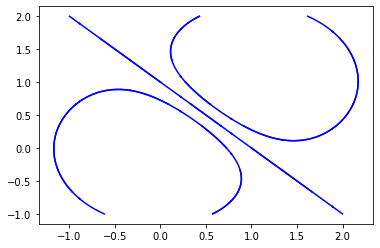

In [28]:
def affichage_complexe_discourse(f, niveaux=[0.0], xc=[0.0, 1.0], yc=[0.0, 1.0], delta=0.01) :
    for c in niveaux :
        level_curves = contour(f, c, xc, yc, delta=0.01)
        for X, Y in level_curves :
            plt.plot(X, Y, 'b')     #si les tables X et Y sont vides, aucun point n'est affiché.
    plt.show()

affichage_complexe_discourse(f_enonce, [0, -0.5, 0.5], xc = np.linspace(-2, 3, 10), yc = np.linspace(-1, 2, 10))

## Comparaison des temps d'exécution

**Conformément à ce qu'on nous a conseillé de faire lors du tutorat du mardi 22/10**, nous avons construit plusieurs méthodes différentes afin de comparer, *in fine*, leurs temps d'exécution respectifs.\
Nous ne réalisons pas de moyenne sur le temps d'exécution car celui-ci est déjà plutôt long. Faire une moyenne serait, certes, plus pertinent, mais demanderait aussi beaucoup trop de temps.

In [66]:
import timeit
def f_simple(x, y) :
    return x**2 + y**2  #on va tester sur une fonction simple

La courbe de niveau (c=0.2) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) a été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) n'a pas été finie d'être dessinée sur ce carré.
La courbe de niveau (c=0.2) n'a pas 

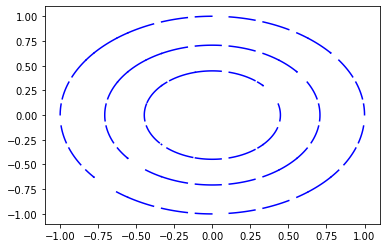

ValueError: stmt is neither a string nor callable

In [67]:
elapsed_time_carre = timeit.timeit(affichage_complexe_carre(f_simple, [0, 0.2, 0.5, 1], xc=np.linspace(-1, 1, 10), yc=np.linspace(-1, 1, 10)))
elapsed_time_cercle = timeit.timeit(affichage_complexe_cercle(f_simple, [0, 0.2, 0.5, 1], xc=np.linspace(-1, 1, 10), yc=np.linspace(-1, 1, 10)))
print(f"carrés :{elapsed_time_carre} VS cercles : {elapsed_time_cercle}")

## Difficultés rencontrées

Nous n'avons pas rencontré de véritable échec puisque nos trois idées ont finalement abouti. Néanmoins nous avons eu des difficultés pour :
- écrire et débugger la méthode des petits carrés (complexité dû au nombre de fonctions impliquées et à la particularisation des cas - cas initial, cas selon le nombre de problèmes, etc.). C'est notamment face à cette méthode longue à écrire et à débugger que nous avons choisi de développer une autre méthode plus simple mais plus précise que le scan : celle des petits cercles.
- écrire à 2 un code faisant intervenir de nombreuses variables (ordre d'appel des paramètres dans les fonctions, imbrication des fonctions,...)
